In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
waveforms2d=np.load('/home/maria/waveform_classification/data/waveform_classification_summary_data_2Dwaveform.npy')

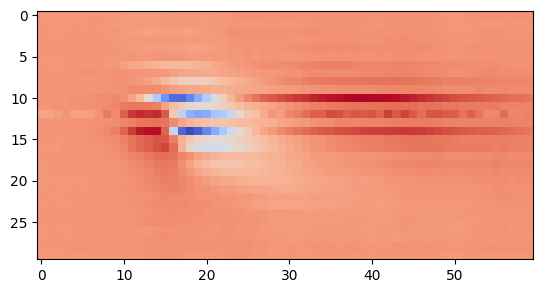

In [5]:
plt.imshow(waveforms2d[15].T,'coolwarm')

In [7]:
a=np.gradient(waveforms2d[8].T)

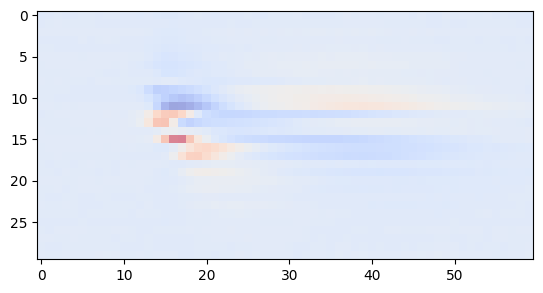

In [8]:
plt.imshow(a[0],'coolwarm',alpha=0.5)
#plt.imshow(a[1],'bwr',alpha=0.5)

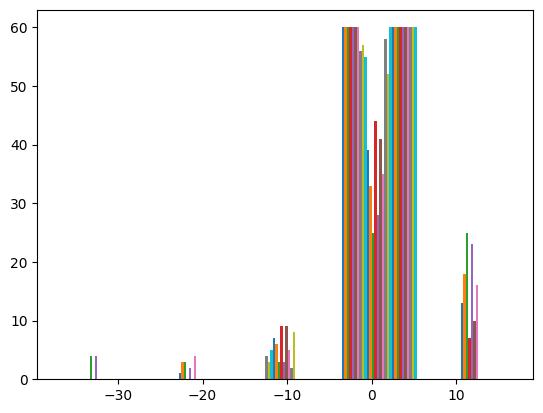

In [117]:
plt.hist(waveforms2d[8],bins=5)
plt.show()

In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=100)
pcs=pca.fit_transform(waveforms2d.reshape(-1,60*30))
var_exp=pca.explained_variance_

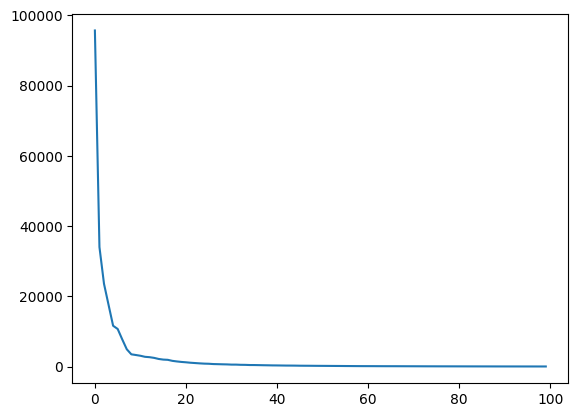

In [13]:
plt.plot(var_exp)

In [25]:
var_exp_ratio=pca.explained_variance_ratio_

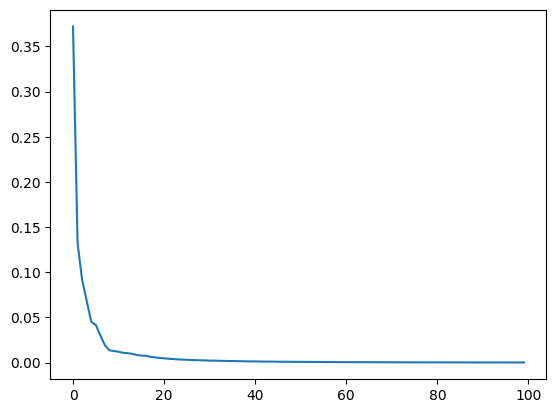

In [26]:
plt.plot(var_exp_ratio)

In [47]:
np.sum(var_exp_ratio[:15])

0.8784325979327804

In [35]:
eigen_waves=pca.components_

In [36]:
eigen_waves.shape

(100, 1800)

In [37]:
eigen_waves=eigen_waves.reshape(-1,60,30)

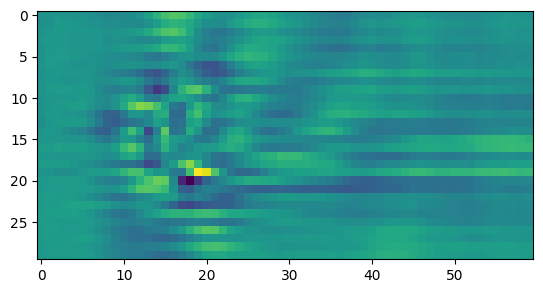

In [45]:
plt.imshow(eigen_waves[99].T)

In [5]:
waveforms2d.shape

(2818, 60, 30)

In [16]:
labels=pd.read_csv('/home/maria/waveform_classification/data/waveform_classification_summary_data_features.csv', sep='\t', index_col=0)

In [17]:
labels.head()

,Below_soma,Above_soma,Spread,Amplitude,Duration,PTratio,RSlope,CSlope,FSRS,ID,File,area,new_type,area_id,within_labels
1,1.166667,2.666667,7,0.047439,0.425796,0.224925,0.041211,-0.044581,0.0,143,0,V1,rs,7.0,1.0
2,-3.833333,0.833333,8,0.048494,0.302178,0.751777,0.042935,-0.207889,1.0,140,0,V1,fs,7.0,0.0
3,0.833333,0.666667,10,0.072349,0.673032,0.397595,0.071316,-0.062895,0.0,124,0,V1,rs,7.0,1.0
4,2.000000,1.166667,8,0.163006,0.686767,0.406901,0.142921,-0.267282,0.0,119,0,V1,rs,7.0,1.0
5,0.000000,2.321429,9,0.091047,0.164824,0.519036,0.035709,-0.447084,1.0,133,0,V1,fs,7.0,0.0


In [20]:
np.unique(labels.area)

array(['AM', 'Ce', 'HP', 'LGN', 'LP', 'RL', 'SC', 'V1'], dtype=object)

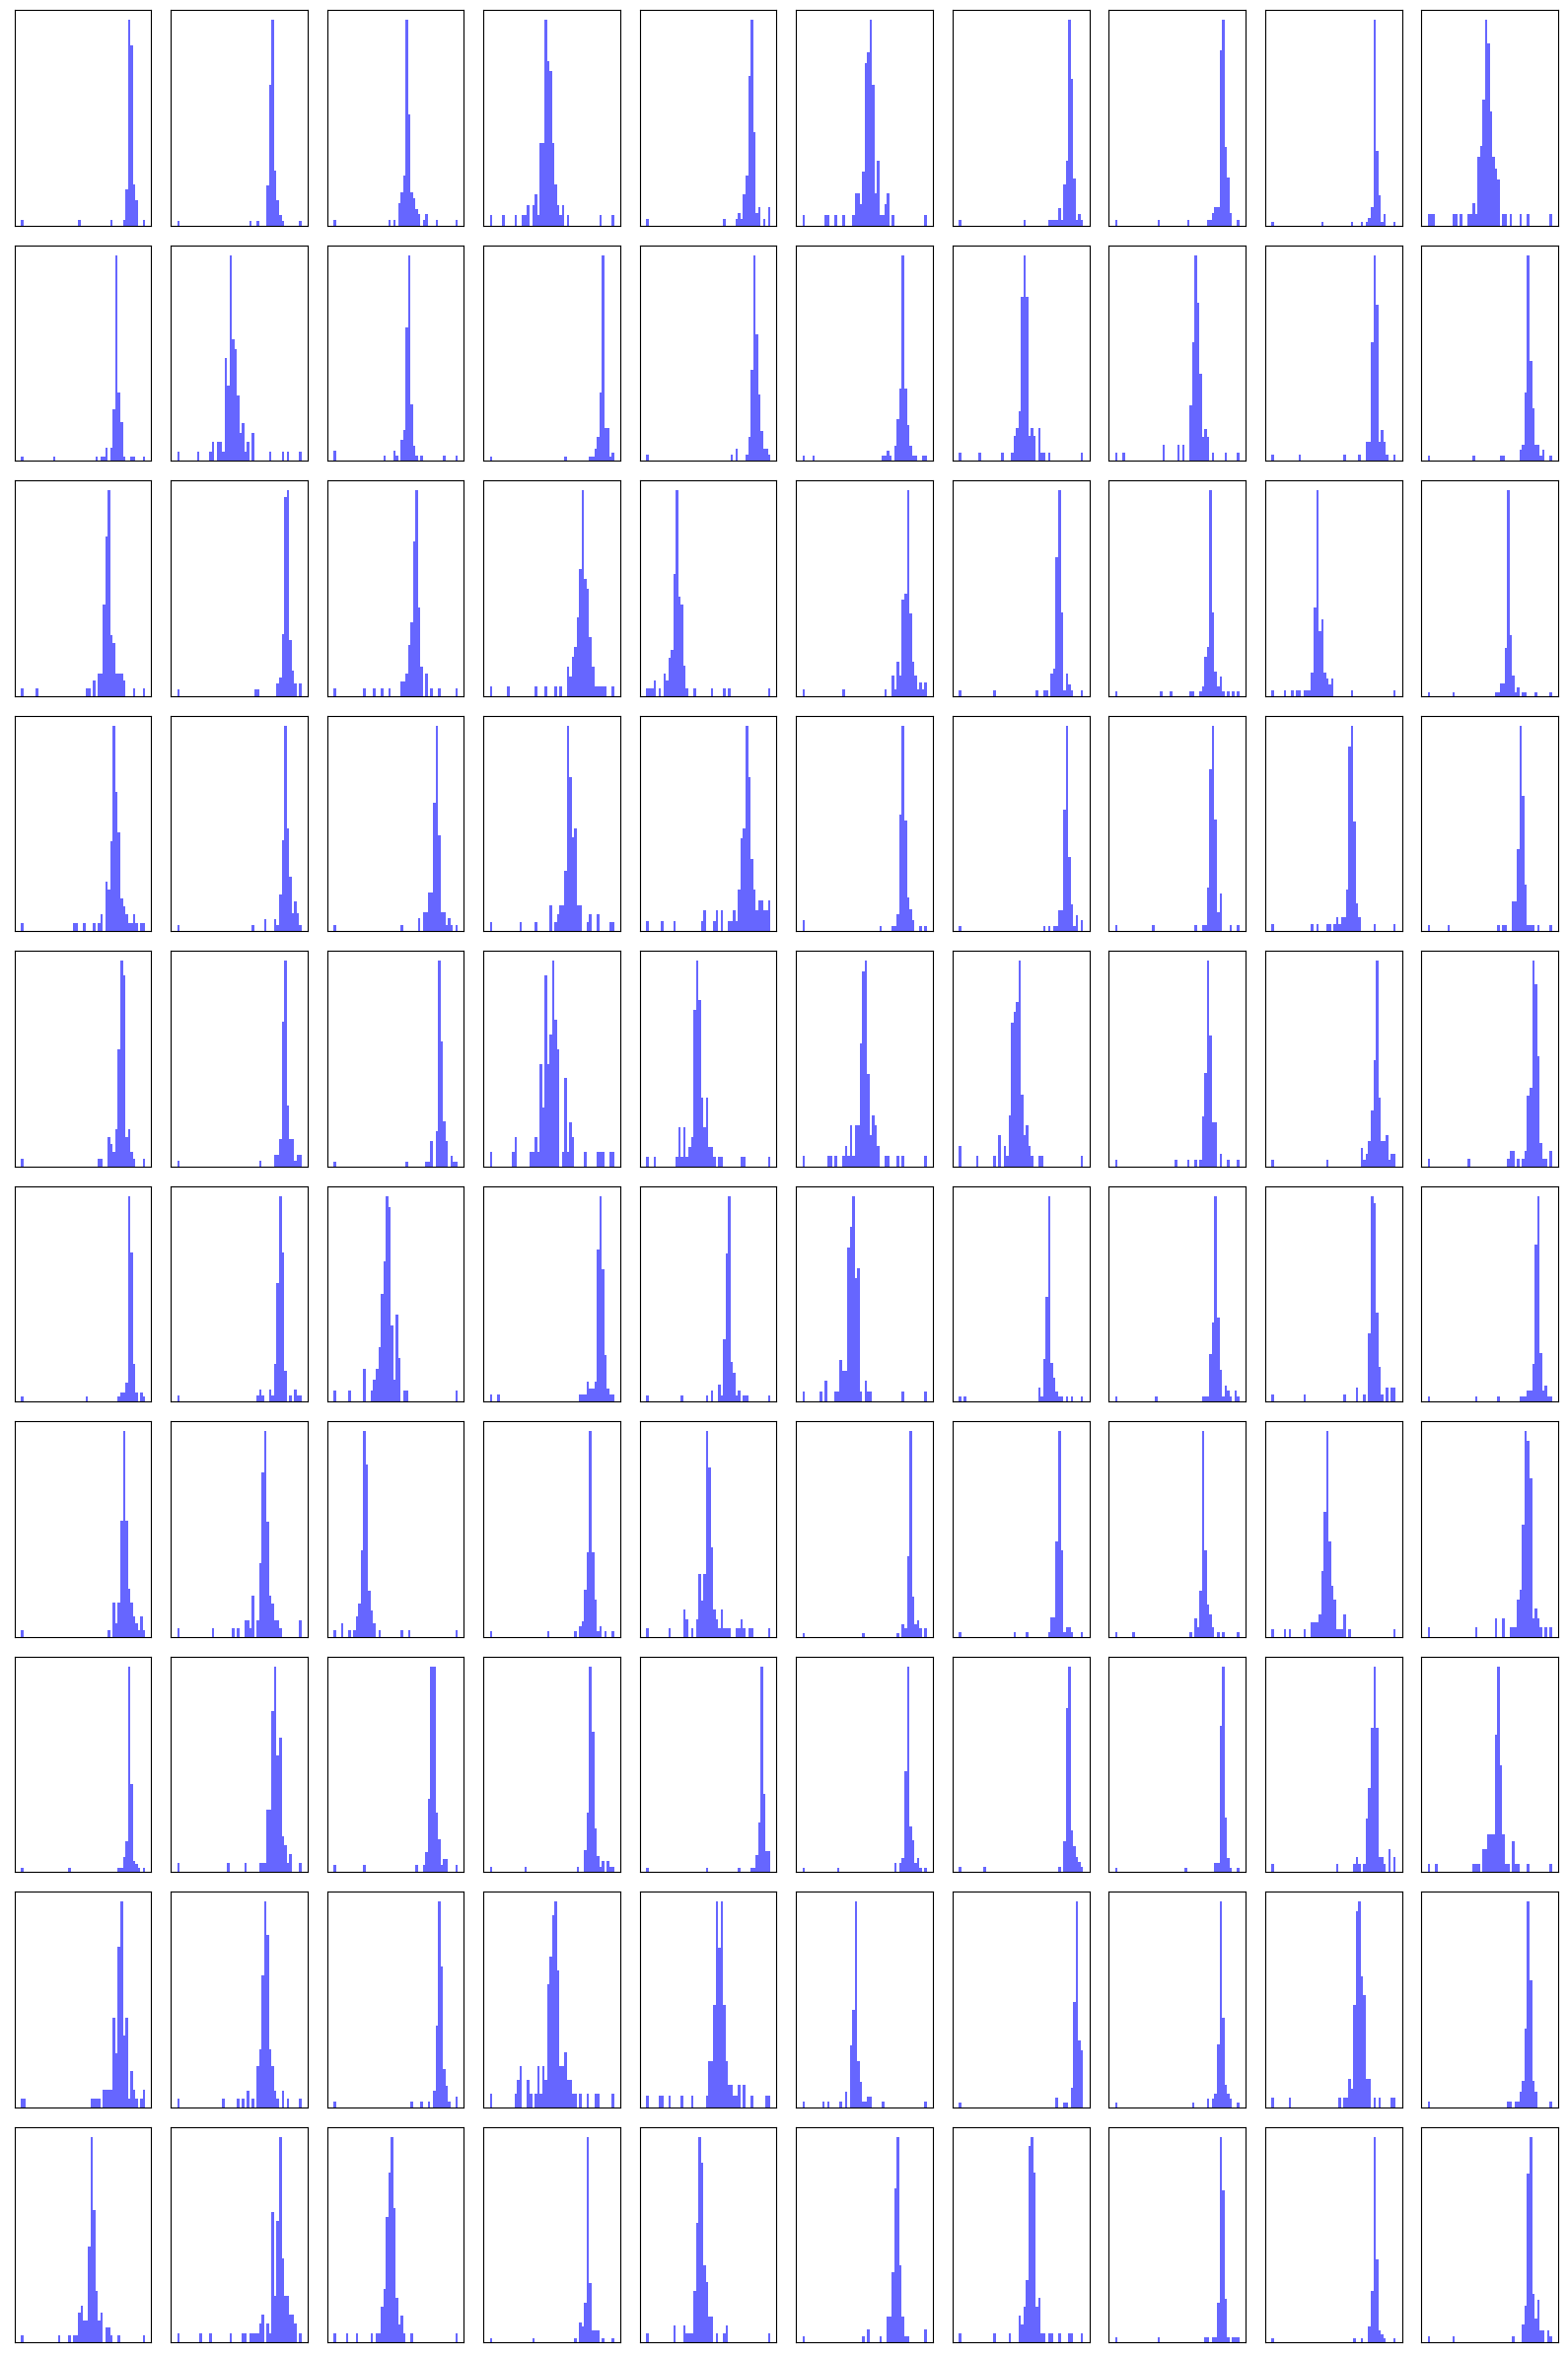

In [55]:
# Define the grid dimensions (adjust as per your preference)
rows = 10  # Number of rows in the grid
cols = 10  # Number of columns in the grid

# Create the figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 24))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each dimension of the embedding
for i, ax in enumerate(axes):
    # Plot the histogram for the i-th dimension of the embedding
    ax.hist(pcs[i,:], bins=50,alpha=0.6, color='blue')

    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

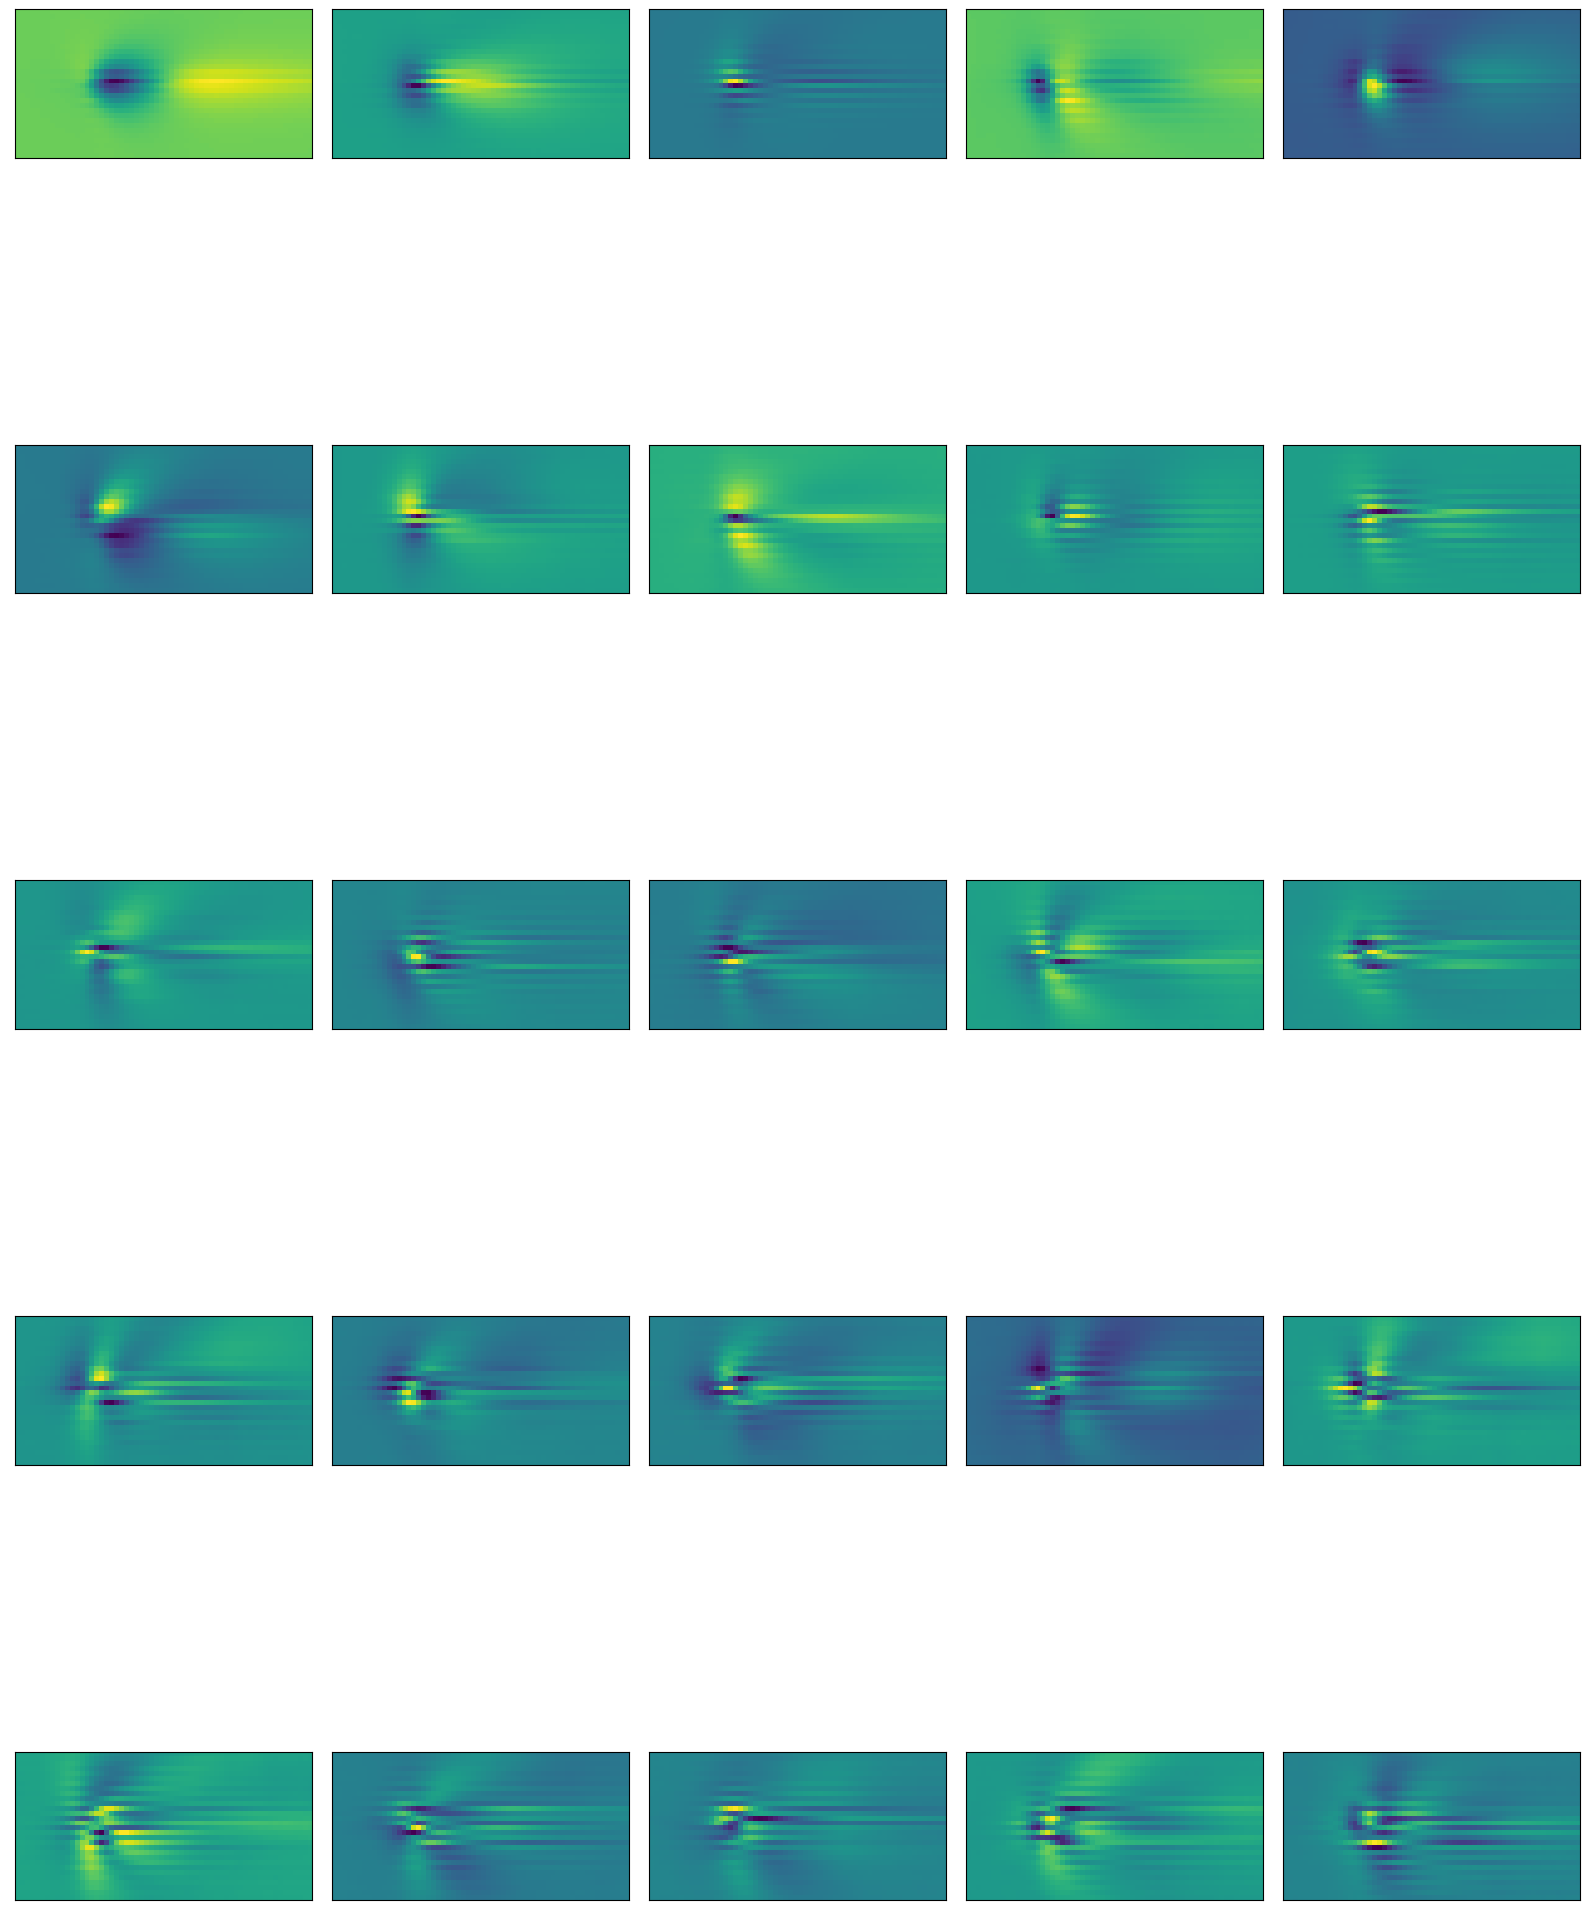

In [58]:
# Define the grid dimensions (adjust as per your preference)
rows = 5  # Number of rows in the grid
cols = 5  # Number of columns in the grid

# Create the figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 24))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each dimension of the embedding
for i, ax in enumerate(axes):
    # Plot the histogram for the i-th dimension of the embedding
    ax.imshow(eigen_waves[i].T)

    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
from sklearn.decomposition import FastICA

ica=FastICA(n_components=100)
cs=ica.fit_transform(waveforms2d.reshape(-1,60*30))
cs_comps=ica.components_

/home/maria/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [52]:
cs_comps=cs_comps.reshape(-1,60,30)

In [53]:
cs_comps.shape

(100, 60, 30)

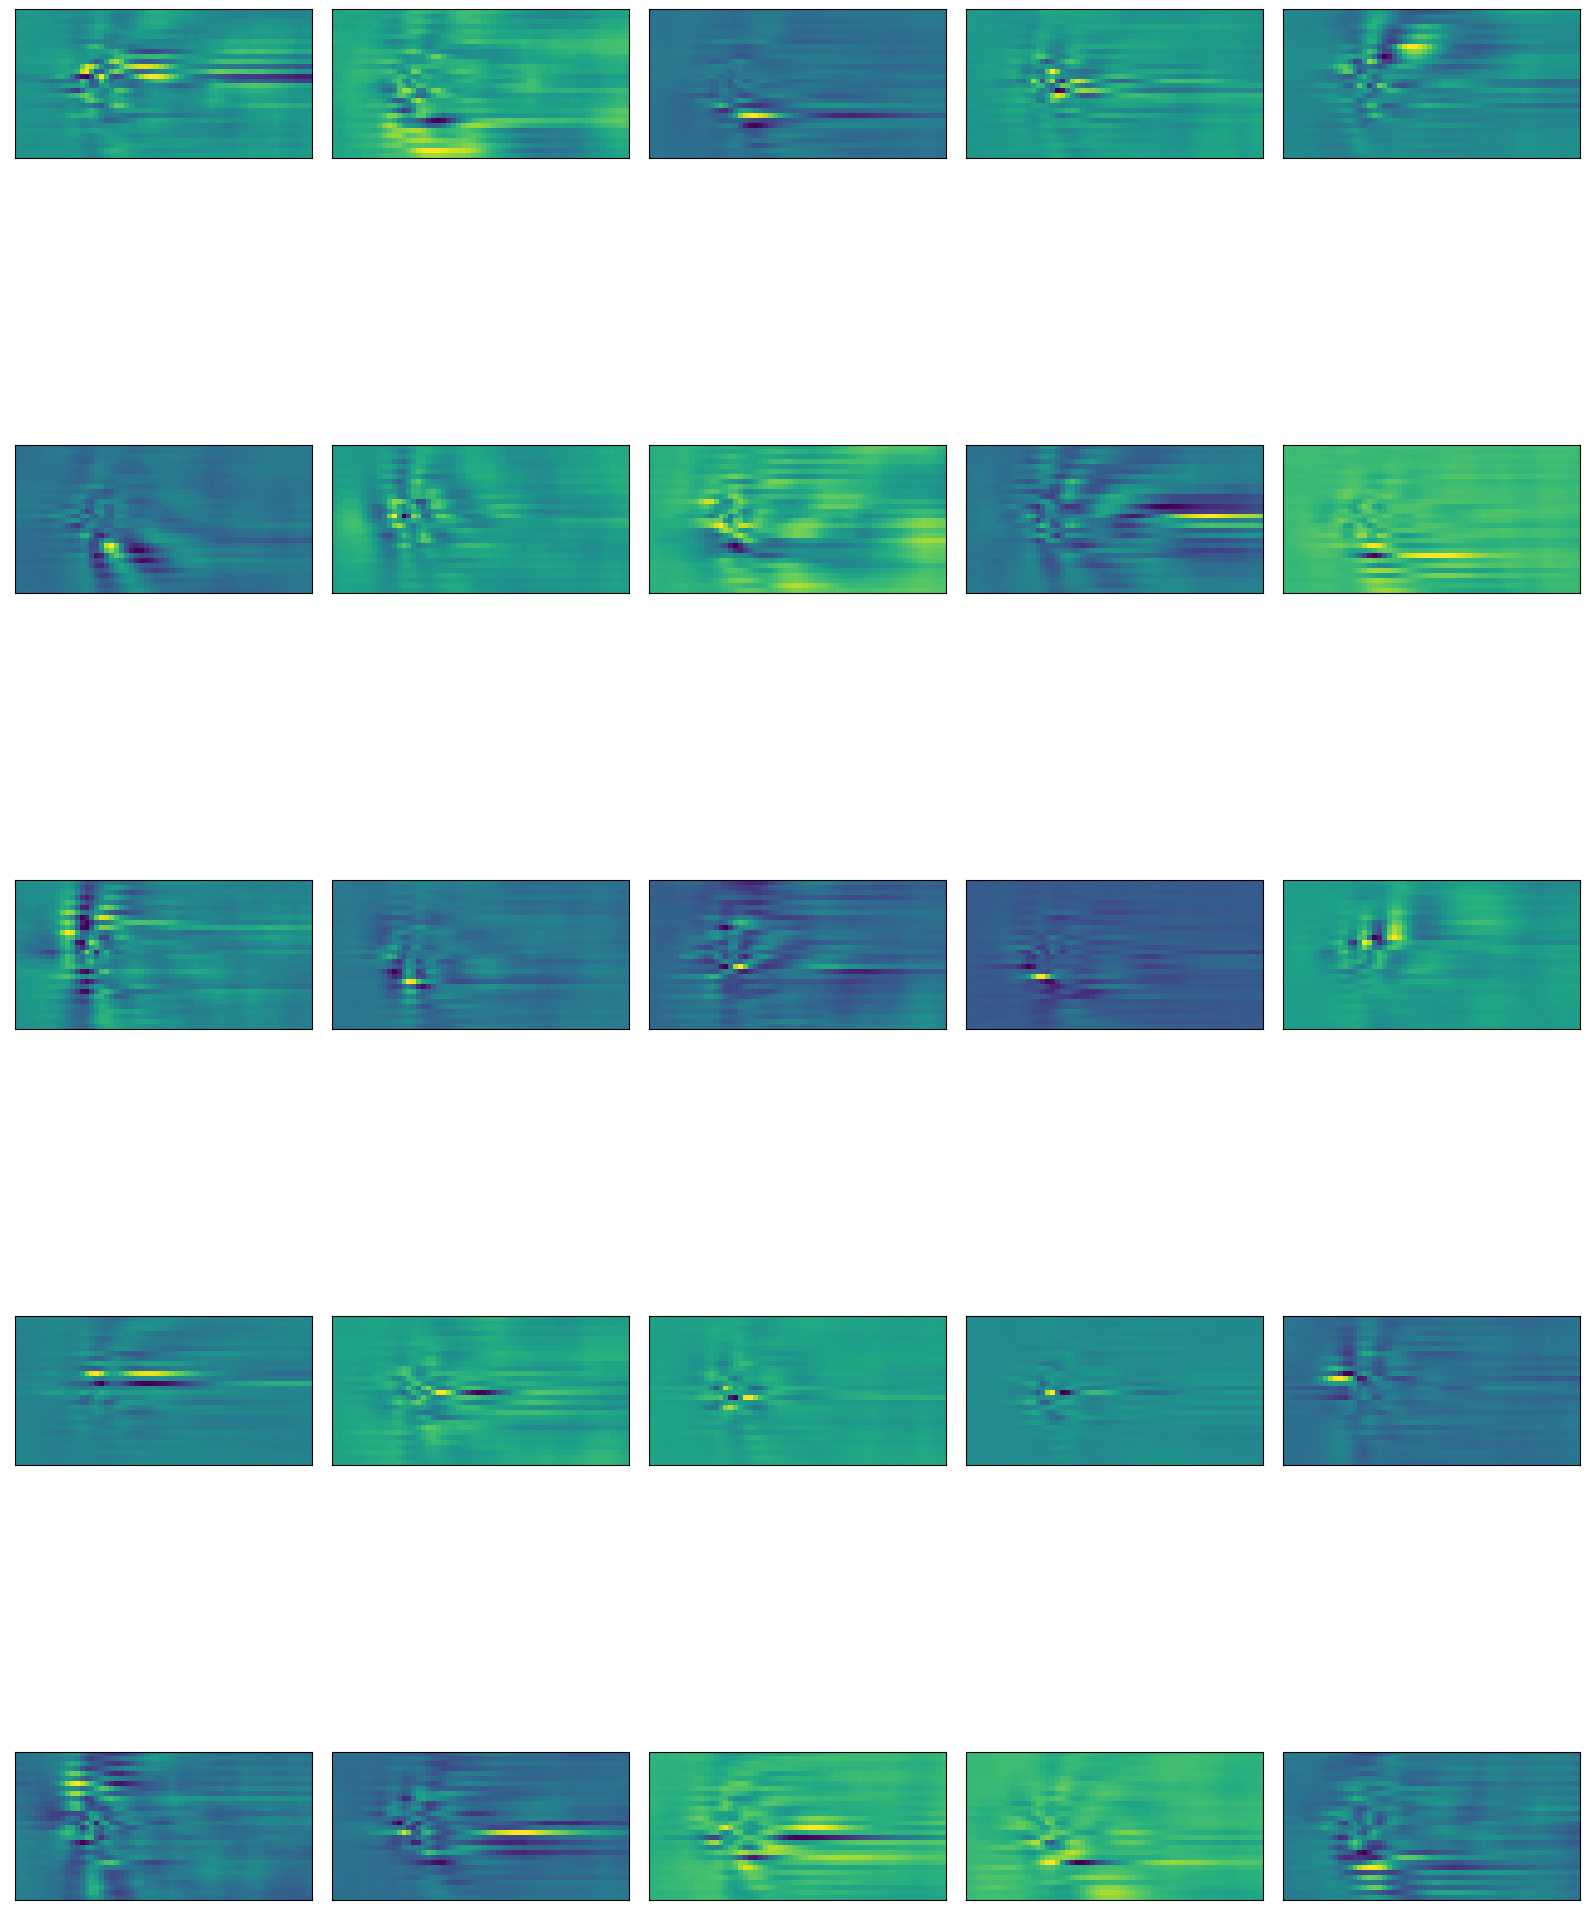

In [57]:
# Define the grid dimensions (adjust as per your preference)
rows = 5  # Number of rows in the grid
cols = 5  # Number of columns in the grid

# Create the figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 24))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each dimension of the embedding
for i, ax in enumerate(axes):
    # Plot the histogram for the i-th dimension of the embedding
    ax.imshow(cs_comps[i].T)

    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

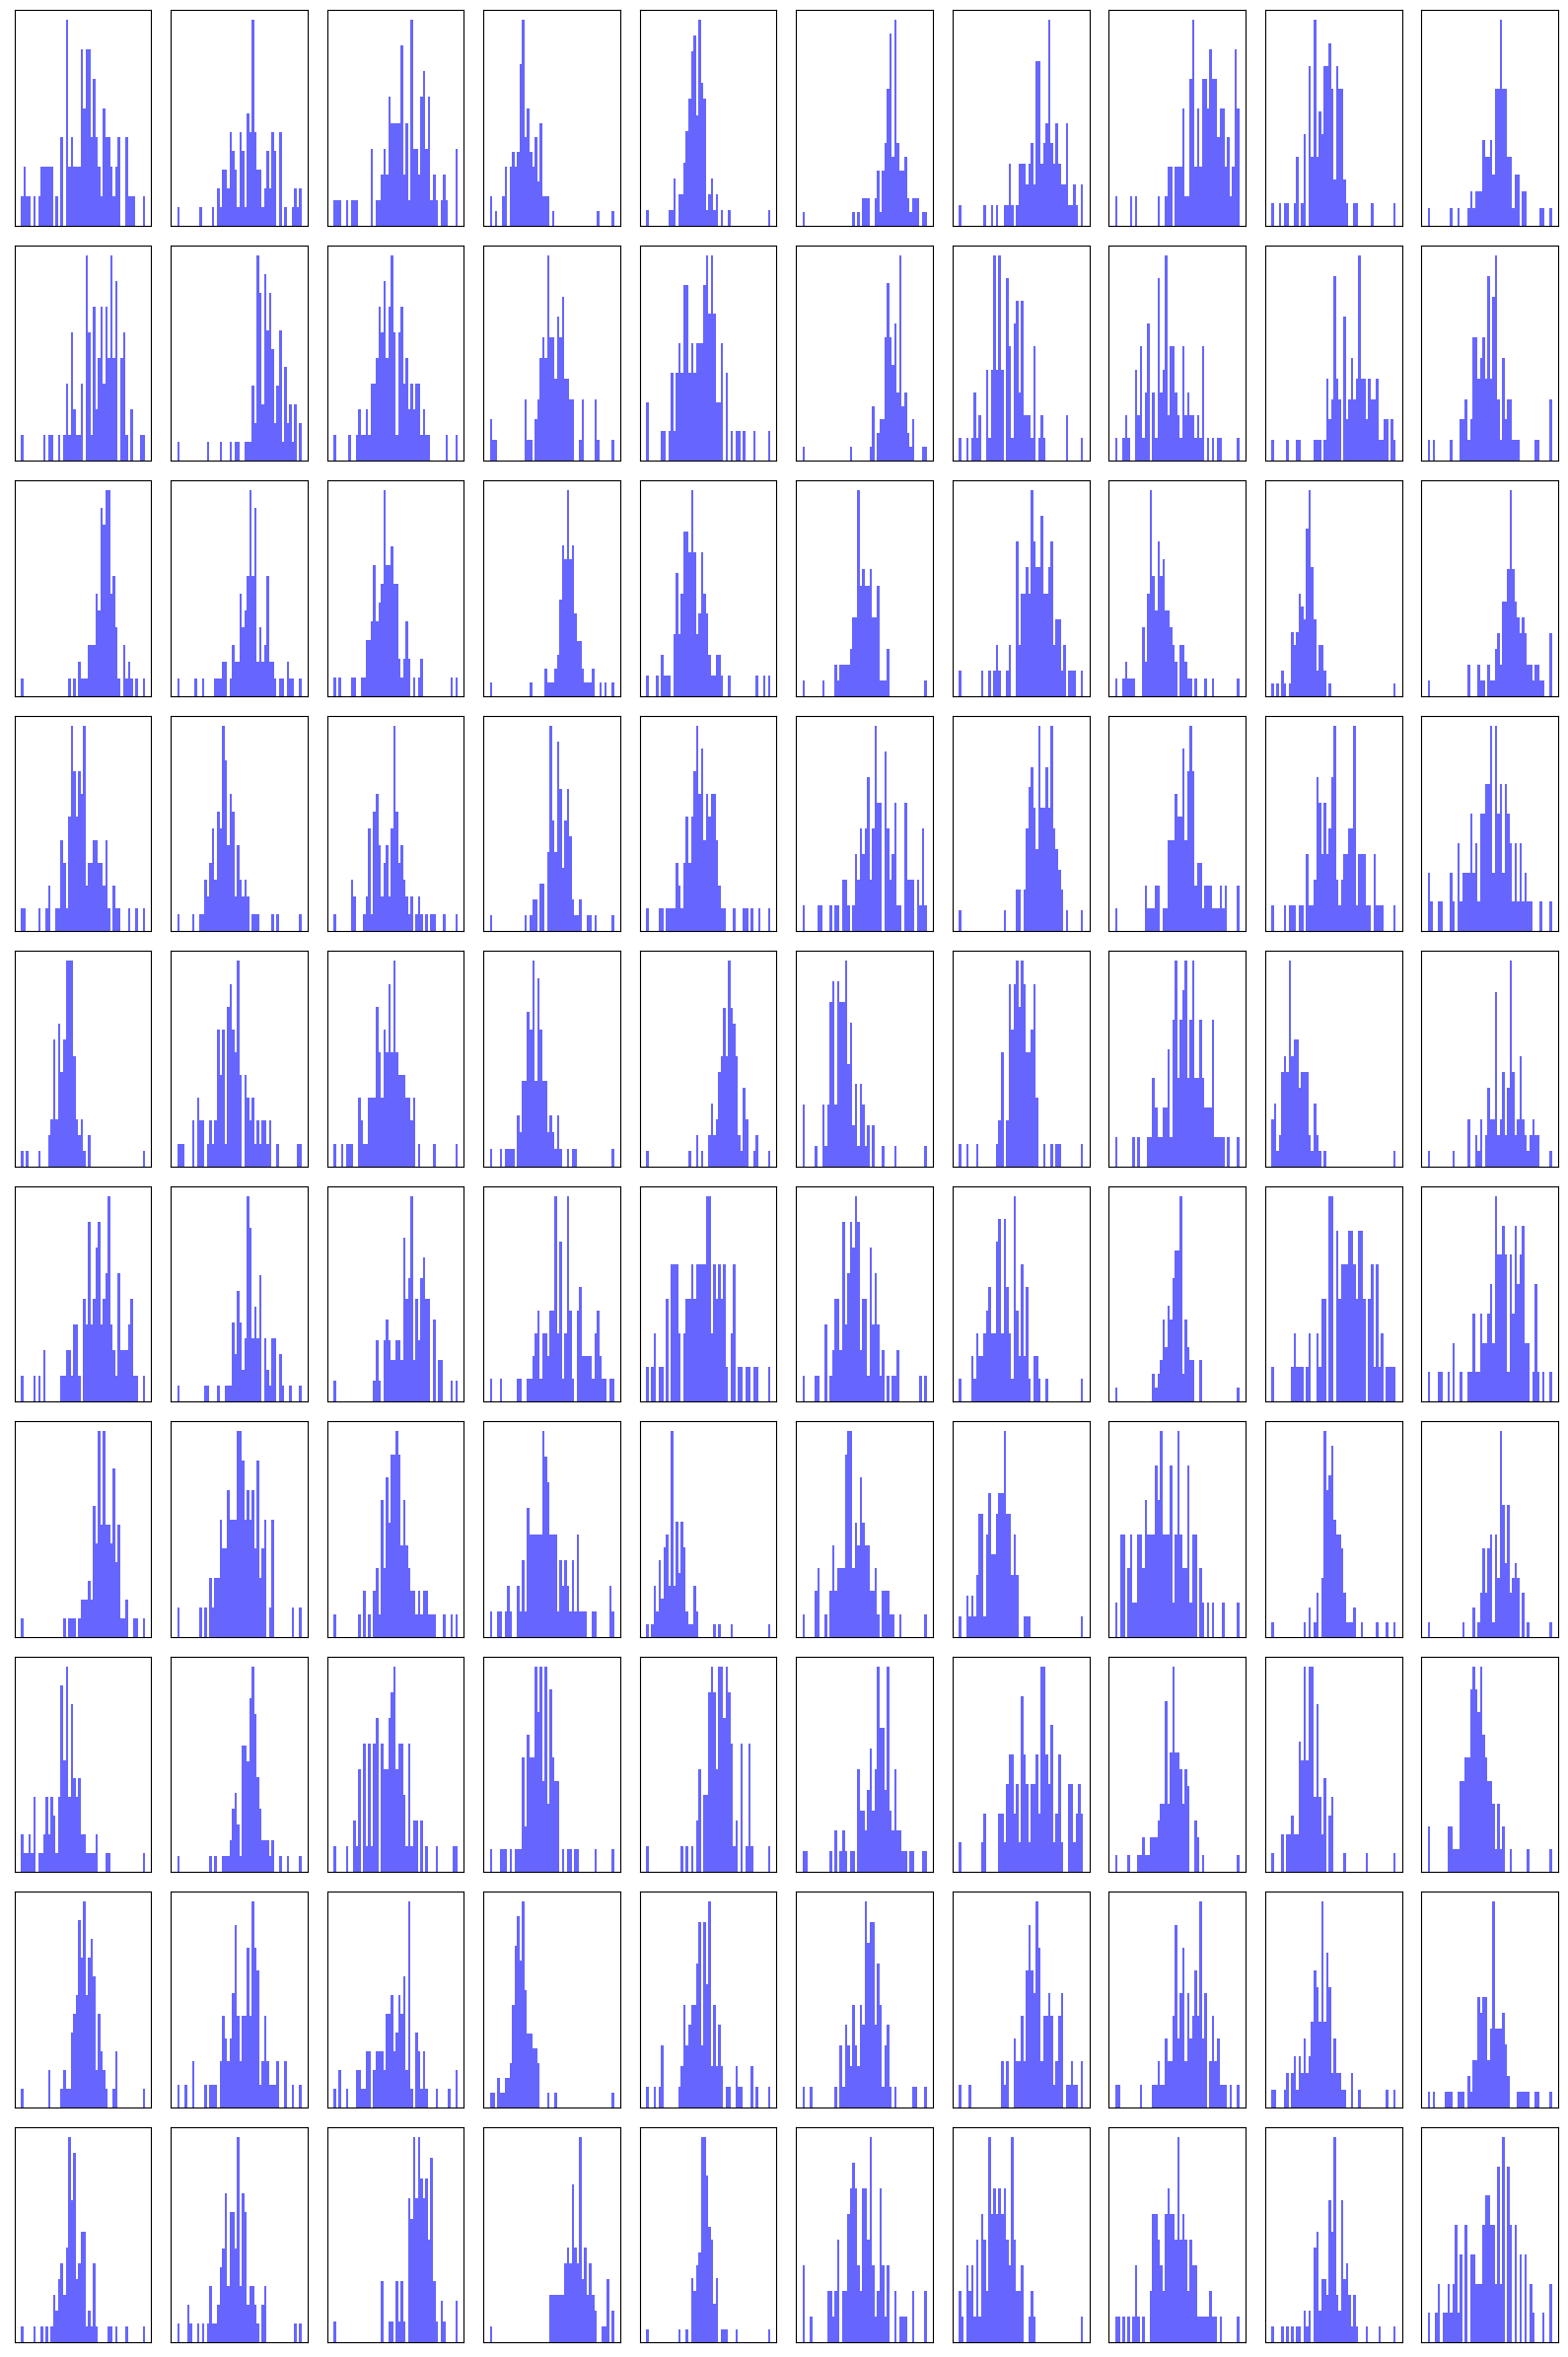

In [56]:
# Define the grid dimensions (adjust as per your preference)
rows = 10  # Number of rows in the grid
cols = 10  # Number of columns in the grid

# Create the figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 24))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each dimension of the embedding
for i, ax in enumerate(axes):
    # Plot the histogram for the i-th dimension of the embedding
    ax.hist(cs[i], bins=50,alpha=0.6, color='blue')

    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [60]:
cs.shape

(2818, 100)

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(cs, labels['area'])

LinearDiscriminantAnalysis()

In [73]:
clf.coef_.shape

(8, 100)

In [80]:
(cs@clf.coef_.T).shape

(2818, 8)

(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,
          1.,   3.,   1.,   0.,   2.,   6.,   4.,   2.,   1.,   8.,   6.,
          8.,  14.,   4.,  10.,   6.,  11.,  16.,  15.,  26.,  15.,  21.,
         28.,  24.,  20.,  29.,  39.,  39.,  28.,  34.,  39.,  32.,  44.,
         42.,  55.,  43.,  49.,  49.,  31.,  38.,  27.,  41.,  38.,  23.,
         33.,  31.,  40.,  46.,  49.,  45.,  55.,  66.,  90., 115., 122.,
        133., 157., 128., 122., 122.,  90.,  78.,  56.,  46.,  44.,  40.,
         26.,  18.,  11.,  16.,  15.,  11.,   5.,   6.,   4.,   3.,   3.,
          3.,   2.,   1.,   1.,   1.,   2.,   1.,   1.,   1.,   0.,   0.,
          2.]),
 array([-10.75854885, -10.57490072, -10.39125259, -10.20760447,
        -10.02395634,  -9.84030821,  -9.65666009,  -9.47301196,
         -9.28936383,  -9.1057157 ,  -8.92206758,  -8.73841945,
         -8.55477132,  -8.3711232 ,  -8.18747507,  -8.00382694,
         -7.82017882,  -7.63653069,  -7.45288256,  -7.26923444

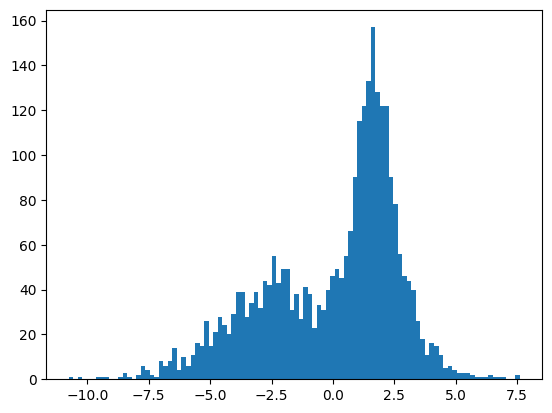

In [88]:
plt.hist(cs@clf.coef_.T[:,7],bins=100)

In [77]:
clf.score(cs,labels['area'])

0.7505322924059616

In [ ]:
plt.scatter()

In [91]:
cs_comps.shape

(100, 60, 30)

In [94]:
clf.coef_[:,7].T.shape

(8,)

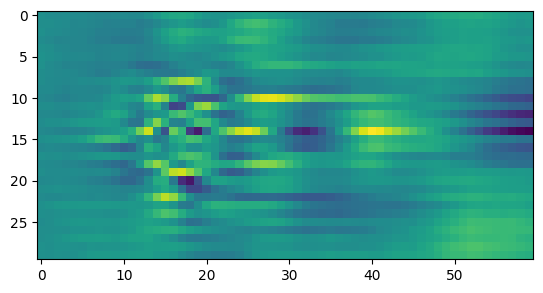

(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,
          1.,   3.,   1.,   0.,   2.,   6.,   4.,   2.,   1.,   8.,   6.,
          8.,  14.,   4.,  10.,   6.,  11.,  16.,  15.,  26.,  15.,  21.,
         28.,  24.,  20.,  29.,  39.,  39.,  28.,  34.,  39.,  32.,  44.,
         42.,  55.,  43.,  49.,  49.,  31.,  38.,  27.,  41.,  38.,  23.,
         33.,  31.,  40.,  46.,  49.,  45.,  55.,  66.,  90., 115., 122.,
        133., 157., 128., 122., 122.,  90.,  78.,  56.,  46.,  44.,  40.,
         26.,  18.,  11.,  16.,  15.,  11.,   5.,   6.,   4.,   3.,   3.,
          3.,   2.,   1.,   1.,   1.,   2.,   1.,   1.,   1.,   0.,   0.,
          2.]),
 array([-10.75854885, -10.57490072, -10.39125259, -10.20760447,
        -10.02395634,  -9.84030821,  -9.65666009,  -9.47301196,
         -9.28936383,  -9.1057157 ,  -8.92206758,  -8.73841945,
         -8.55477132,  -8.3711232 ,  -8.18747507,  -8.00382694,
         -7.82017882,  -7.63653069,  -7.45288256,  -7.26923444

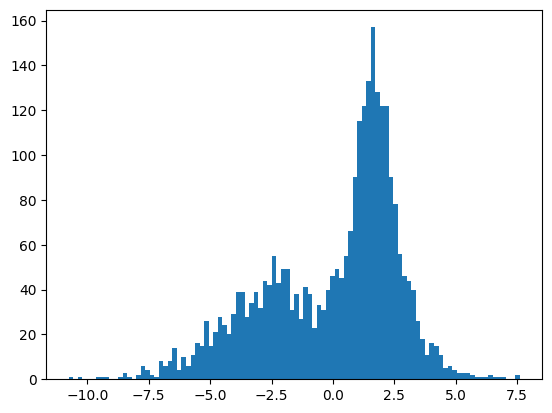

In [111]:
i=7
im=(clf.coef_.T[:,i]@cs_comps.reshape(-1,60*30)).reshape(60,30)
plt.imshow(im.T)
plt.show()
plt.hist(cs@clf.coef_.T[:,i],bins=100)

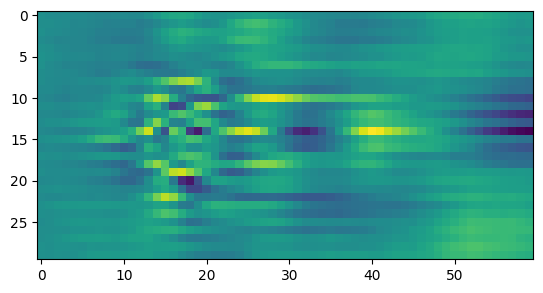

In [101]:
plt.imshow(im.T)